## Question: Apply PCA to the Iris dataset and visualize the relationships between samples in 2D.
### PART I (species will be visualized separately)
#### Step 1: Import Necessary Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


### Step 2: Load the Iris Dataset
#### This will be loarded directly from the sklearn.datasets

In [15]:
# load daga
iris = load_iris()
X = iris.data
y = iris.target
# Convert the dataset iinto a DataFrame for easier handling
iris_dataFrame = pd.DataFrame(X, columns=iris.feature_names)
# Add the target (species) as a column
iris_dataFrame['Label'] = y
iris_dataFrame['species'] = iris_dataFrame['Label'].map({0:'Setosa', 1:'Versicolor', 2:'Virginica'})
iris_dataFrame = iris_dataFrame.drop('Label', axis=1)
# Display the first few rows of the dataset
iris_dataFrame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [16]:
iris_dataFrame.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [17]:
iris_dataFrame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Step 3: Standardize the Data
#### PCA is sensitive to the scale of the features. Hence, it's a common practice to standardize the data so that each feature has a mean of 0 and a variance of 1.

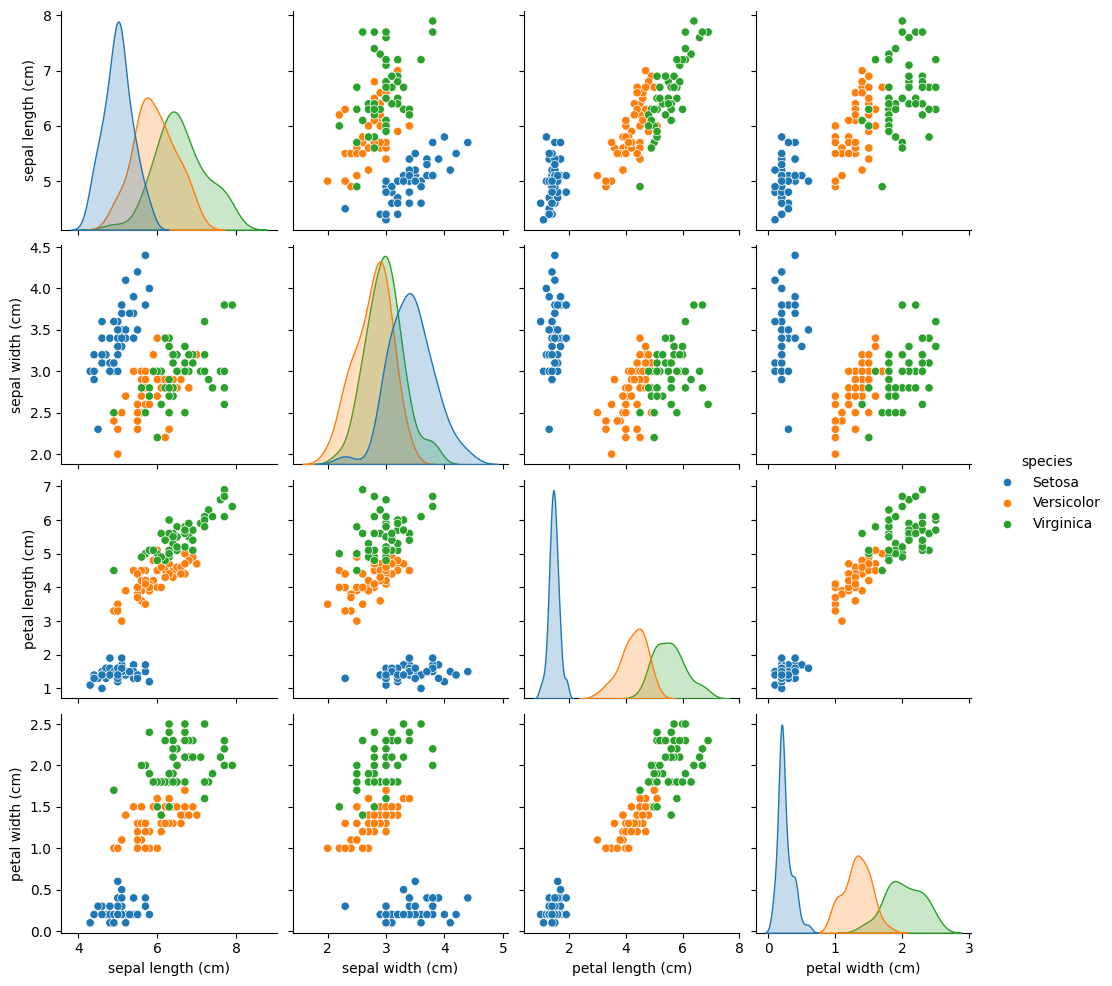

In [19]:

sns.pairplot(iris_dataFrame, hue="species")

### Step 4: Apply PCA
#### Now we'll apply PCA to reduce the dimensionality of the data from 4 features to 2 principal components.

In [20]:
# import the model
pca = PCA()
X_pca = pca.fit_transform(X)
# Check the explained variance ratio to see how much information is retained
print("Explained variance ratio: ", pca.explained_variance_ratio_)

Explained variance ratio:  [0.92461872 0.05306648 0.01710261 0.00521218]


### Step 5: Create a DataFrame for Visualization
#### We need to create a DataFrame to store the principal components and the species label for easy plotting.

In [33]:
# Create a DataFrame with the two principal components and the species
pca_dataFrame = pd.DataFrame(X_pca, columns=('PCA1','PCA2','PC3', 'PC4'))
# merge the two dataFrame
merged_DataFrame = pd.merge( iris_dataFrame, pca_dataFrame, left_index=True, right_index=True)
merged_DataFrame.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,PCA1,PCA2,PC3,PC4
0,5.1,3.5,1.4,0.2,Setosa,-2.684126,0.319397,-0.027915,0.002262
1,4.9,3.0,1.4,0.2,Setosa,-2.714142,-0.177001,-0.210464,0.099027
2,4.7,3.2,1.3,0.2,Setosa,-2.888991,-0.144949,0.017900,0.019968
3,4.6,3.1,1.5,0.2,Setosa,-2.745343,-0.318299,0.031559,-0.075576
4,5.0,3.6,1.4,0.2,Setosa,-2.728717,0.326755,0.090079,-0.061259


In [40]:
# Check the explained variance ratio to see how much information is retained
for index in range(4):
    print('PCA{}:{}'.format(index + 1, pca.explained_variance_ratio_[index]))

PCA1:0.9246187232017341
PCA2:0.05306648311706383
PCA3:0.017102609807927525
PCA4:0.00521218387327465


### Step 6: Visualize the Data
#### We'll now visualize the samples in the reduced 2D space (the two principal components), colored by species.

<Axes: xlabel='PCA1', ylabel='species'>

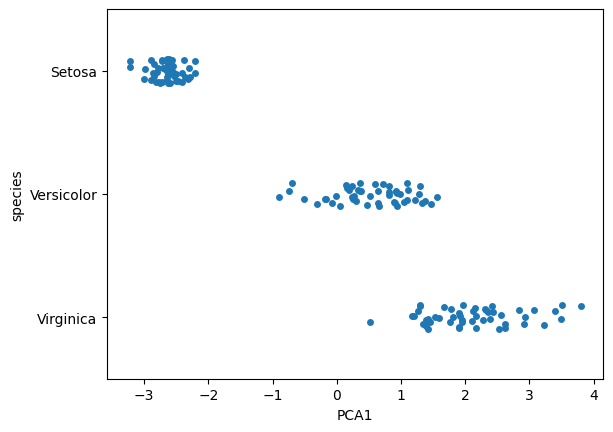

In [44]:
# Visualise with One Dimension
sns.stripplot(x='PCA1', y='species', data=merged_DataFrame, jitter=True)

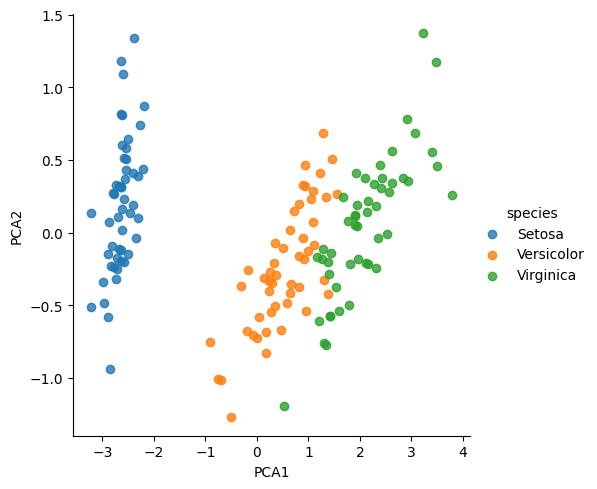

In [43]:
# Visualise with Two Dimension
sns.lmplot(x='PCA1', y='PCA2', data=merged_DataFrame, hue='species', fit_reg=False)